<a href="https://colab.research.google.com/github/AdityaAdke123/letsgrowmore_tasks/blob/main/Letsgrowmore_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [160]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [161]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [162]:
df.shape

(2035, 8)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [164]:
df['Date'] = pd.to_datetime(df['Date'])

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [166]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<ipython-input-167-c5829fea4689>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,color="yellow")


<Axes: >

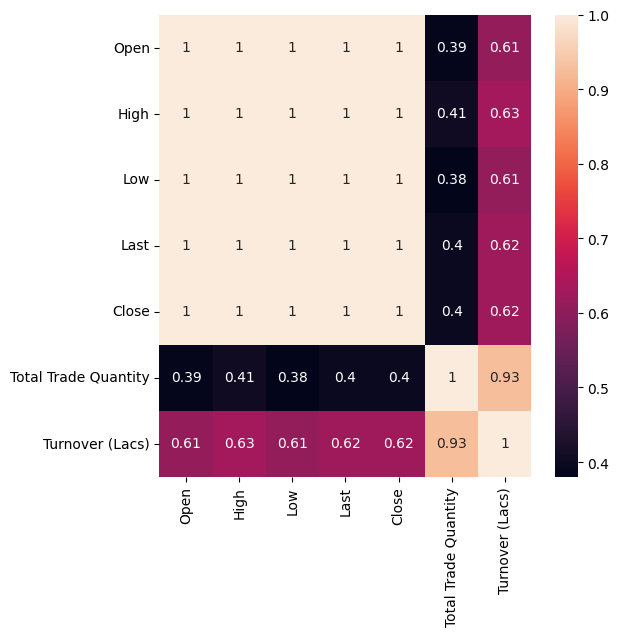

In [167]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True,color="yellow")

<Axes: xlabel='Date'>

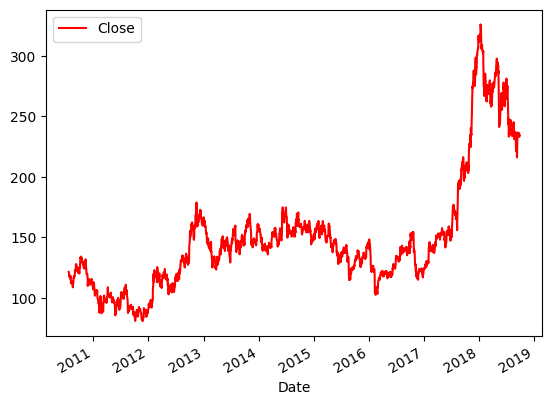

In [168]:
df.plot(x="Date", y='Close', color="red")

In [169]:
df1=df.reset_index()['Close']

In [170]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [171]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [172]:
training_data,testing_data = train_test_split(df1,test_size=0.35)

In [173]:
training_data.shape

(1322, 1)

In [174]:
def create_dataset(data,size=1):
    x=[]
    y=[]
    for i in range(len(data)-size-1):
        a = data[i:(i+size),0]
        x.append(a)
        y.append(data[i+size,0])
    return np.array(x),np.array(y)

In [175]:
size = 100
x_train, y_train = create_dataset(training_data, size)
x_test, ytest = create_dataset(training_data, size)

In [176]:
x_train.shape

(1221, 100)

In [177]:
y_train.shape

(1221,)

In [178]:
x_test.shape

(1221, 100)

In [179]:
ytest.shape

(1221,)

In [180]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [181]:
x_train.shape

(1221, 100, 1)

In [182]:
y_train.shape

(1221,)

In [183]:
x_test.shape

(1221, 100, 1)

In [184]:
ytest.shape

(1221,)

In [185]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [186]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

39/39 [==============================] - 2s 44ms/step


In [187]:
train_predict

array([[-0.0112594 ],
       [-0.01132768],
       [-0.01147334],
       ...,
       [-0.00975281],
       [-0.00964682],
       [-0.00956254]], dtype=float32)

In [188]:
test_predict

array([[-0.0112594 ],
       [-0.01132768],
       [-0.01147334],
       ...,
       [-0.00975281],
       [-0.00964682],
       [-0.00956254]], dtype=float32)

In [189]:
train_predict

array([[-0.0112594 ],
       [-0.01132768],
       [-0.01147334],
       ...,
       [-0.00975281],
       [-0.00964682],
       [-0.00956254]], dtype=float32)

In [190]:
test_predict

array([[-0.0112594 ],
       [-0.01132768],
       [-0.01147334],
       ...,
       [-0.00975281],
       [-0.00964682],
       [-0.00956254]], dtype=float32)

In [191]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.35542304291217025

In [192]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.35542304291217025